In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
# MNIST veri setini keras modülü üzerinden indireceğiz.

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step 


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Eğitim ve test görüntülerini ueniden boyutlandırıyoruz (kanal sayısı için)

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
# -1 parametresi, verinin kendi sayısını ifade eder
# yani biz 6000 ya da 10000 yazmak yerşne -1 yazınca, kod bunu anlıyor

#Görüntüleri normalize ediyoruz (0 ile 1 arasında ifade ediyoruz-pikselleri)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Şimdi, ön işlemeden sonra görüntünün taoplam sayısını ve kanalını gösterelim

print(f"Eğitim görüntüsü sayısı ve boyutu = {x_train.shape}")
print(f"Test görüntüsü sayısı ve boyutu = {x_test.shape}")

Eğitim görüntüsü sayısı ve boyutu = (60000, 28, 28, 1)
Test görüntüsü sayısı ve boyutu = (10000, 28, 28, 1)


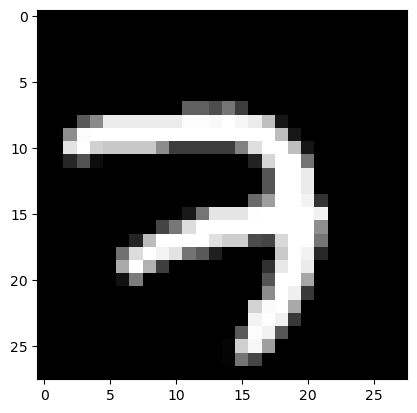

In [5]:
# Görüntüyü (x_train) ve onun etiketini (y_train)
# Görüntüler (Eğitim) x_train değişkeninde, onun etiketi ise y_train değişkenine

plt.imshow(x_train[5000],cmap="gray")

In [6]:
y_train[5000]

np.uint8(7)

In [7]:
# Hem eğitim hem de test verilerinin bilgisinin yani etiketinin tutulduğu
# y_train ve y_test değişkenlerinde sadece rakam bilgisi yer alıyor
# yukarıda da görüldüğü 

# Ancak, yapay zeka modelimize bunu aktarmadan önce modelin anlayabilceği
# hale getirmemiz lazım

# Nümerik verilerin bit seviyesinde kategorik verilere dönüştürülmesine
# OneHot encoding işlemi denir. Biz de şimdi aşağıda one-hot encoding
# işlemi yapcağız

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [8]:
y_train[5000]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [ ]:
# Şimdi de eğitim verisi içerisinde eğitim-doğrulma verisi (train-validation)
# ayrımını yapıyoruz

# Eğitim verisinin bir kısmını (%20'sini) doğrulama olarak seçiyoruz
# Bunu, yukarıda import ettiğimiz train_test_split metodyla yapcağız
# Not: yukrıda ilk veri setini aldığımızda küçük harfle x_ yapmıştık
# asağıda ise büyük harfle X_ yapcağız

X_train, X_val, y_train_split, y_val =  train_test_split(
    x_train, y_train,   # yukarıdaki veri ayrımını x_train ve y_train'den çekiyoruz
    test_size=0.2,      # validation data olarak eğitimin yüzde 20'si alınsın
    random_state=42     # verileri split yaparken (ayırırken) belli bir 
                        # rassallığa sadık kalacak (bir sornaki ayrım işleminde de aynı değerleri
                        # verirsek, aynı verileri ayıracak)
    stratify = y_train  # etiket sayısına sadık kalarak buna oranla
                        #bir ayrım işlemi yapacak

)
